In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

from tensorflow.keras import layers
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



C:\Users\zakar\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
dtypes = {
"duration": np.int8,
"protocol_type": object,
"service": object,
"flag": object,
"src_bytes":  np.int8,
"dst_bytes":  np.int8,
"land": np.int8,
"wrong_fragment":  np.int8,
"urgent": np.int8,
"hot": np.int8,
"m_failed_logins":  np.int8,
"logged_in":  np.int8,
"num_compromised":  np.int8,
"root_shell":  np.int8,
"su_attempted":  np.int8,
"num_root": np.int8,
"num_file_creations":  np.int8,
"num_shells":  np.int8,
"num_access_files":  np.int8,
"num_outbound_cmds":  np.int8,
"is_host_login":  np.int8,
"is_guest_login":  np.int8,
"count": np.int8,
"srv_count":  np.int8,
"serror_rate": np.float16,
"srv_serror_rate": np.float16,
"rerror_rate": np.float16,
"srv_rerror_rate": np.float16,
"same_srv_rate": np.float16,
"diff_srv_rate": np.float16,
"srv_diff_host_rate": np.float16,
"dst_host_count":  np.int8,
"dst_host_srv_count":  np.int8,
"dst_host_same_srv_rate": np.float16,
"dst_host_diff_srv_rate": np.float16,
"dst_host_same_src_port_rate": np.float16,
"dst_host_srv_diff_host_rate": np.float16,
"dst_host_serror_rate": np.float16,
"dst_host_srv_serror_rate": np.float16,
"dst_host_rerror_rate": np.float16,
"dst_host_srv_rerror_rate": np.float16,
"label": object
}

columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","m_failed_logins",
"logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files",
"num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
"same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
"dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
"dst_host_srv_rerror_rate","label"]


In [4]:
df = pd.read_csv("data/kdd99/kddcup.data_10_percent/kddcup.data_10_percent_corrected", sep=",", names=columns, dtype=dtypes, index_col=None)

In [5]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,-75,74,0,0,0,0,...,9,1.0,0.0,0.109985,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,-17,-26,0,0,0,0,...,19,1.0,0.0,0.049988,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,-21,57,0,0,0,0,...,29,1.0,0.0,0.029999,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,-37,57,0,0,0,0,...,39,1.0,0.0,0.029999,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,-39,-16,0,0,0,0,...,49,1.0,0.0,0.020004,0.0,0.0,0.0,0.0,0.0,normal.


In [6]:
df.label.value_counts()

label
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [7]:
#Feature Selection
new_features=['dst_bytes',
 'logged_in',         
'srv_count',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
  'dst_host_srv_serror_rate',
 'dst_host_same_src_port_rate','label']


In [9]:
# 0 for normal data and 1 for abnormalities
df.label=df.label.apply(lambda x: 0 if x == 'normal.' else 1)

In [10]:
df=df[new_features]

In [11]:
#label encoding 
for column in df.columns:
    if df[column].dtype == object:
        encoded = LabelEncoder()
        
        encoded.fit(df[column])
        df[column] = encoded.transform(df[column])

In [12]:
# 

In [13]:
#randomly sample 500 data point for training
df_train=df[df.label==0].sample(30000)

In [14]:
#remove the item sampled from our dataset
index_list=df_train.index
df=df.drop(index_list)

In [15]:
X = df_train.drop('label', axis=1)
    
y_test = df_train['label']

In [16]:
X = X.astype(np.float64)

X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [17]:
X.shape

(30000, 8)

In [19]:
### 2nd Discriminator model #######
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(64))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    
    model.add(layers.Dense(64))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(8))  # Output shape adjusted to match discriminator's input shape
    model.add(layers.Reshape((1, 8)))  # Reshape to (None, 1, 8) to match discriminator's input shape

    return model


In [21]:
### 2nd Discriminator model #######
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(32, use_bias=False, input_shape=[1,8]))
   
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.1))

    model.add(layers.Dense(64, use_bias=True))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.1))
    
    model.add(layers.Dense(32, use_bias=True))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.1))

    model.add(layers.Dense(16, use_bias=True))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.1))
    
    model.add(layers.Dense(8, use_bias=True))
    model.add(layers.LeakyReLU())

   
    model.add(layers.Dense(1))
   # model.add(layers.Softmax())

    return model

In [22]:
generator=make_generator_model()
discriminator=make_discriminator_model()

In [23]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [24]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [26]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [27]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [28]:
EPOCHS = 150
noise_dim = 100
#num_examples_to_generate = 16
BATCH_SIZE = 32


In [29]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    images=tf.reshape(images,(1,8))
    images = tf.expand_dims(images, axis=0) 

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training= True)

        real_output = discriminator (images, training= True)
        fake_output = discriminator(generated_images, training= True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator= gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)


    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    return (gen_loss,disc_loss)


In [30]:
history=dict()
history['gen']=[]
history['dis']=[]
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for batch in dataset:
           gen_loss,dis_loss= train_step(batch)
        history['gen'].append(gen_loss)
        history['dis'].append(dis_loss)
        print ('Time for epoch {} is {} sec '.format(epoch + 1, time.time()-start))

In [31]:
x_train= X
train(x_train,EPOCHS) 


Time for epoch 1 is 30.003230571746826 sec 
Time for epoch 2 is 28.44958996772766 sec 
Time for epoch 3 is 28.311334371566772 sec 
Time for epoch 4 is 28.499659538269043 sec 
Time for epoch 5 is 28.893002033233643 sec 
Time for epoch 6 is 28.421043872833252 sec 
Time for epoch 7 is 28.224095821380615 sec 
Time for epoch 8 is 28.33144450187683 sec 
Time for epoch 9 is 28.715457916259766 sec 
Time for epoch 10 is 28.75258994102478 sec 
Time for epoch 11 is 28.572458267211914 sec 
Time for epoch 12 is 28.158090353012085 sec 
Time for epoch 13 is 28.38358998298645 sec 
Time for epoch 14 is 28.41399836540222 sec 
Time for epoch 15 is 28.446221828460693 sec 
Time for epoch 16 is 28.317784070968628 sec 
Time for epoch 17 is 28.434793949127197 sec 
Time for epoch 18 is 28.43782091140747 sec 
Time for epoch 19 is 28.68306064605713 sec 
Time for epoch 20 is 30.41757893562317 sec 
Time for epoch 21 is 28.376193523406982 sec 
Time for epoch 22 is 28.578215837478638 sec 
Time for epoch 23 is 28.277

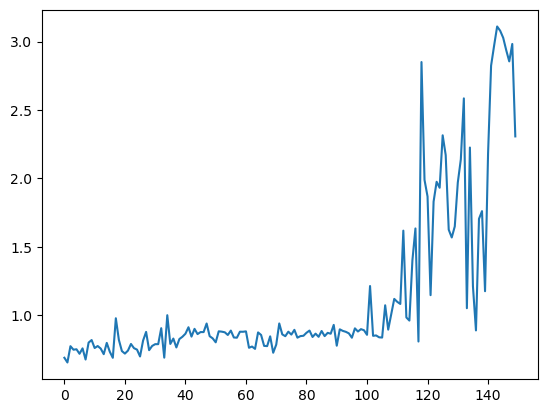

In [32]:
plt.plot(history['gen'])

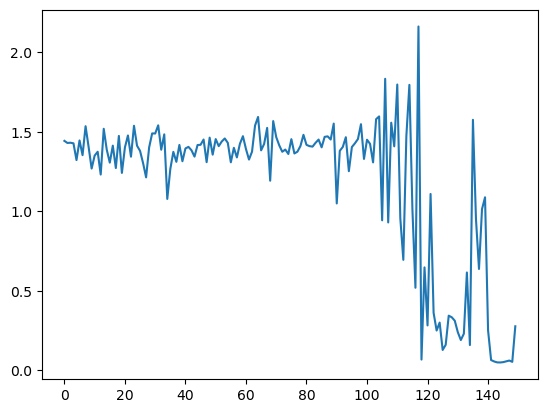

In [33]:
plt.plot(history['dis'])

In [34]:
!pip install mlxtend


In [40]:
y_test=df.label
x_test=df.drop('label',axis=1).values.reshape(-1,1,8)

In [41]:
# y_test=df.label
# x_test=df.drop('label',axis=1).values.reshape(-1,1,8)

x_test_indices = df.drop('label', axis=1).sample(2000).index

# Use the indices to retrieve corresponding values from y_test
y_test_selected = y_test.loc[x_test_indices]

In [42]:
y_pred=discriminator.predict(x_test)
from sklearn.metrics import average_precision_score, accuracy_score ,recall_score, f1_score


14501/14501 [==============================] - 7s 478us/step


In [43]:
prob=[-0.2,-0.1,-0.05,0,0.005,0.1, 0.2, 0.4]
for p in prob:
    pred_value =[1 if i<p   else 0 for i in y_pred]
    f1=f1_score(y_test,pred_value)
    acc=accuracy_score(y_test,pred_value)
    precision=average_precision_score(y_test,pred_value)
    recall= recall_score(y_test,pred_value)
    print(f'prob ={p} and f1 score ={f1} : accuracy={acc} : precision={precision} : recall={recall}')
    print(pred_value.count(0),pred_value.count(1))

prob =-0.2 and f1 score =0.9172062973414526 : accuracy=0.8558384211059413 : precision=0.8980219710314015 : recall=0.933937082695851
52804 411217
prob =-0.1 and f1 score =0.9171949453568821 : accuracy=0.8558168703571606 : precision=0.8980015069699834 : recall=0.933937082695851
52794 411227
prob =-0.05 and f1 score =0.917192674993688 : accuracy=0.8558125602074044 : precision=0.8979974142771313 : recall=0.933937082695851
52792 411229
prob =0 and f1 score =0.9171892694699714 : accuracy=0.8558060949827702 : precision=0.8979912753124955 : recall=0.933937082695851
52789 411232
prob =0.005 and f1 score =0.9171892694699714 : accuracy=0.8558060949827702 : precision=0.8979912753124955 : recall=0.933937082695851
52789 411232
prob =0.1 and f1 score =0.9171654315120372 : accuracy=0.8557608384103306 : precision=0.8979483050678579 : recall=0.933937082695851
52768 411253
prob =0.2 and f1 score =0.9171554206832365 : accuracy=0.8557414427364278 : precision=0.8979281853157123 : recall=0.9339396032192124
5

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

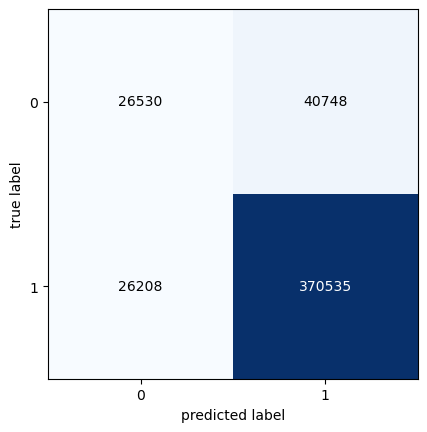

In [44]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,pred_value)
plot_confusion_matrix(conf_mat=mat)